In [3]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot

jtplot.style()

import statsmodels.api as sm

In [34]:
df = pd.read_csv('./../data/Monsteruitslagen_Resultaten.csv')
df['datetime'] = pd.to_datetime(df.datum + ' ' + df.tijd)

def convert_tappunt(x):
    x = str(x).lower()
    if 'thermostatische douchemengkraan' in x or 'therm.' in x:
        return 'douche'
    if 'douche' in x:
        return 'douche'
    if '1e tappunt' in x:
        return '1e tappunt'
    return 'overige'

def convert_ruimte(x):
    x = str(x).lower()
    if 'kelder' in x:
        return 'kelder'
    if 'kamer' in x:
        return 'kamer'
    if 'appartement' in x:
        return 'appartement'
    if 'technische ruimte' in x:
        return 'technische ruimte'
    if 'kapsalon' in x:
        return 'kapsalon'
    return 'overige'
    
df['tappunt_simple'] = df.tappunt.apply(convert_tappunt)
df['ruimte_simple'] = df.ruimte.apply(convert_ruimte)
df['location_is_Noorderkroon'] = df.locatienaam.str.contains('Noorderkroon')

df_tmp = df[df.component == 'Koper (ICP-MS)'].copy()
# df_tmp.resultaat = df_tmp.resultaat.str.replace('<100', '0').astype(int)
df_tmp.resultaat.groupby(pd.qcut(df_tmp.tempvoor, 4)).describe()

def get_level(x):
    for i in [0,1,2,3,4]:
        if '{}.'.format(i) in x:
            return i
    return -1
    
df_tmp['app_level'] = df_tmp.ruimte.apply(get_level)

In [35]:
df.groupby(df.component).count().id

component
Bacteriën van de coligroep             9
Calcium (ICP-MS)                      12
EGV 20°C                               9
Enterokokken spp                       9
Escherichia coli (standaard test)      9
Geanalyseerd volume                  159
Intestinale enterokokken               9
Koloniegetal 22 °C                   324
Koper (ICP-MS)                       314
Legionella non-pneumophila           143
Legionella pneumophila               143
Magnesium (ICP-MS)                    12
Stoorflora                             9
Temperatuur tijdens meting            18
Totaal Legionella spp                461
Totale hardheid berekend              12
Waterstofcarbonaat                     9
Zilver (ICP-MS)                      314
Zuurgraad                              9
Name: id, dtype: int64

In [37]:
df_kelder = df_tmp[df_tmp.ruimte_simple == 'kelder']
df_appa = df_tmp[df_tmp.ruimte_simple != 'kelder']

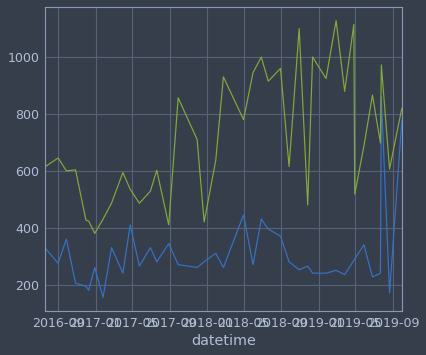

In [39]:
(df_kelder.resultaat ).astype(float).groupby(df_kelder.datetime.dt.date).mean().plot()
(df_appa.resultaat ).astype(float).groupby(df_appa.datetime.dt.date).mean().plot()

datetime
2016-07-18     6
2016-08-31     4
2016-09-27     4
2016-10-27     6
2016-11-30     6
2016-12-09     3
2016-12-29     3
2017-01-25     6
2017-02-22     6
2017-03-31     6
2017-04-24     3
2017-05-24     5
2017-06-29     6
2017-07-20     6
2017-08-28     3
2017-09-28     3
2017-11-29     1
2017-12-22     1
2018-01-29     6
2018-02-23     2
2018-03-28     1
2018-04-30     5
2018-05-31     2
2018-06-27     1
2018-07-20     5
2018-08-29     4
2018-09-26     4
2018-10-29    10
2018-11-26     2
2018-12-12     2
2019-01-25    18
2019-02-27    14
2019-03-27    15
2019-04-26     3
2019-04-29     6
2019-05-29     7
2019-06-26    16
2019-07-22     9
2019-07-25     9
2019-08-21     8
2019-09-30    15
Name: resultaat, dtype: int64